# ЦПТ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Рассмотрим распределение $\chi^2$ c 12 степенями свободы ($\textit{df}$ = 12)

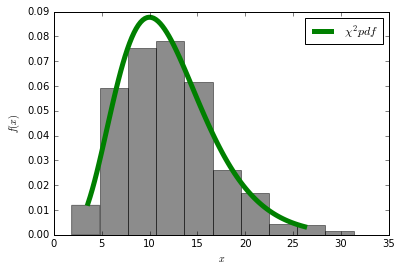

In [2]:
df = 12
# зададим границы графика функции chi2
x = np.linspace(sts.chi2.ppf(0.01, df),
                sts.chi2.ppf(0.99, df), 100)
# сгенерируем выборку размера 1000
chi_2 = sts.chi2.rvs(df, size=1000)
# нарисуем гисторамму, используем normed = True, иначе будут разные соотношения оси Oy
plt.hist(chi_2, normed = True, alpha = .45, color = "black")
# добавим граифик функции плотности вероятности
plt.plot(x, sts.chi2.pdf(x, df),
        color = 'green', lw = 5, label ='$\chi^2 pdf$')
# Добавляем легенду к графиук
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Рассчитаем параметры нормального распределения для и построим поверх гистрограммы функция плотности вероятности

Для размера выборки n = 5 (обозначен как sample_size)

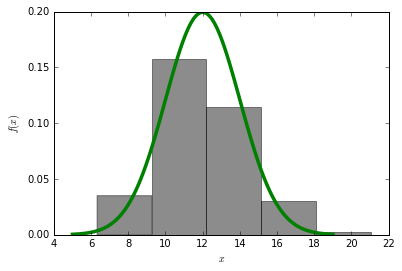

In [3]:
sample_size = 5
# Рассчитаем 1000 средних из выборок рамера n = 5 для распределения chi2
means = []
for i in np.arange(1, 1000):
   means.append(sts.chi2.rvs(df, size = sample_size).mean())
# Рассчитаем параметры нормального распределения, апроксимируюшего выборочные средние из chi2
mu = df # среднее для распределения chi2 равно количеству степеней свободы
sigma = np.sqrt(2*df / sample_size) # Дисперсия chi2 равна удвоенному количеству степеней свободы. Так как нам требуется
# для нормального распределения задавать параметр ВЫБОРОЧНОГО стандартного отклонения, то мы берем корень отношения дисперсии
# и размера выборки
norm_rv = sts.norm(loc=mu, scale=sigma) # создаем распределение с заданными параметрами N~(mu, sigma)
rvs = norm_rv.rvs(1000) # генерируем выборку размера 1000
x = np.linspace(mu - 3*sigma - 1, mu + 3*sigma + 1,100) # Т.к. практически все значения лежат в пределах от +-3симга от среднего,
# зададим соответствующие пределы для x
pdf = norm_rv.pdf(x) # генерируем функция плотности вероятности для нашего нормального распределения, апроксимируюшего
# наши выборочные средние из распределения chi2
# Строим графики
plt.plot(x, pdf, color = "green", lw = 3.5)
plt.hist(means, bins = sample_size, color = "black", alpha = .45, normed = True)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()  

Проделываем вышеуказанные действия, изменяя размер выборки

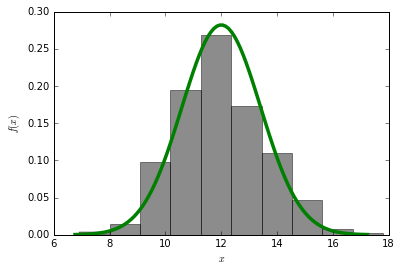

In [7]:
sample_size = 10
means = []
for i in np.arange(1, 1000):
   means.append(sts.chi2.rvs(df, size = sample_size).mean())
mu = df
sigma = np.sqrt(2*df /sample_size)
norm_rv = sts.norm(loc=mu, scale=sigma)
rvs = norm_rv.rvs(1000)
x = np.linspace(mu - 3*sigma - 1, mu + 3*sigma + 1,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, color = "green", lw = 3.5)
plt.hist(means, bins = sample_size, color = "black", alpha = .45, normed = True)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show() 

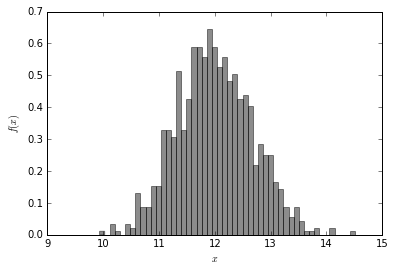

In [9]:
sample_size = 50
means = []
for i in np.arange(1, 1000):
    means.append(sts.chi2.rvs(df, size = sample_size).mean())
mu = df
sigma = np.sqrt(2*df /sample_size)
norm_rv = sts.norm(loc=mu, scale=sigma)
rvs = norm_rv.rvs(1000)
x = np.linspace(mu - 3*sigma - 1, mu + 3*sigma + 1,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, color = "green", lw = 3.5)
plt.hist(means, bins = sample_size, color = "black", alpha = .45, normed = True)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show() 


Таким образом, в соответствии с центральной предельной теоремой, с росто размера выборки точность нормально апроксимации увеличивается, что наглядно продемонстрировано на графиках.